In [1]:
'''
Wathershed algorithm

'''
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display_image(img, cmap='gray'):
    fig = plt.figure(figsize =(12,10))
    ax = fig.add_subplot(111)
    ax = plt.imshow(img, cmap='gray')

In [3]:
def display(img, cmap = 'gray'):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

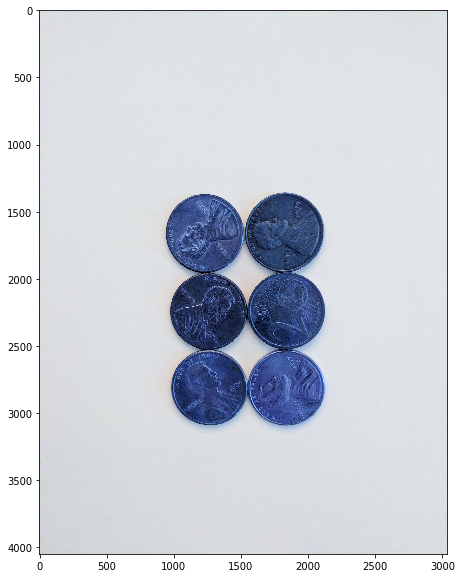

In [4]:
sep_coins = cv2.imread('./original/Computer-Vision-with-Python/DATA/pennies.jpg')
#plt.imshow(sep_coins)
display(sep_coins)

In [ ]:
# The image needs to be separated into 7 segments....6 pennies plus 1 white background = 7 
# we will apply median blur just to foucs on the circle, not the face on the coin
# Turn it to gray
# apply binary threshold =>  make it black and white
# Find the contours...



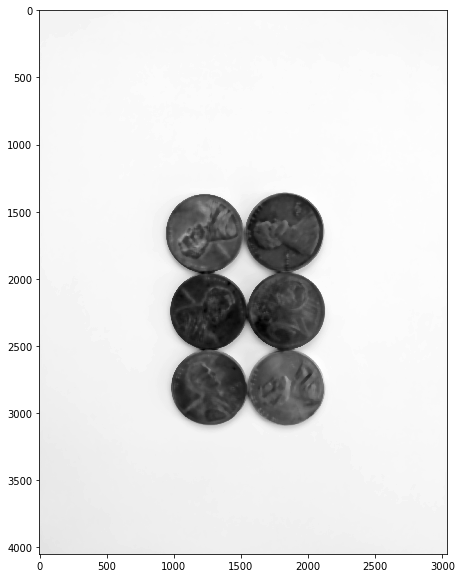

In [7]:
# median blur
sep_blur = cv2.medianBlur(sep_coins, 25)  # 25 is the kernel size
# make it gray
gray_sept_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGRA2GRAY)
display(gray_sept_coins)

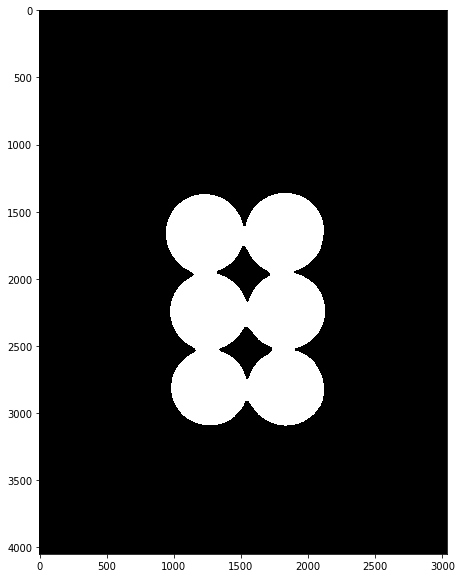

In [8]:
# make it black and white using contours
ret, sep_thresh = cv2.threshold(gray_sept_coins,160,255,cv2.THRESH_BINARY_INV)
#cv2.THRESH_BINARY_INV means foreground is white.
display(sep_thresh)

In [9]:
# now get the contours of the image

contours, heirarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if heirarchy[0][i][3]==-1:  # remember, -1  is the external contours
        cv2.drawContours(sep_coins,contours, i,(255,0,0),10)
        


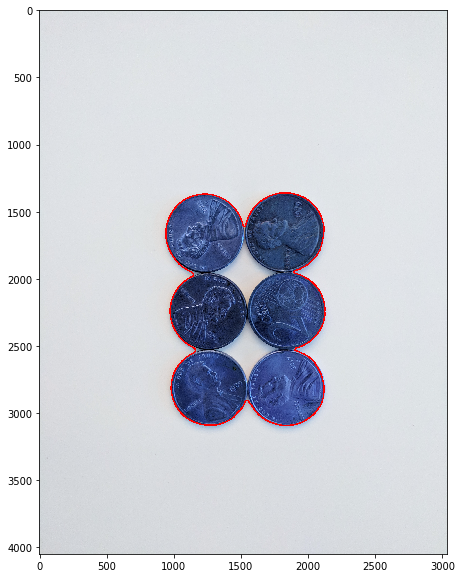

In [10]:
display(sep_coins)

In [11]:
# Watershed Algo part 2
# step 1:  Read in the image
sep_coins = cv2.imread('./original/Computer-Vision-with-Python/DATA/pennies.jpg')

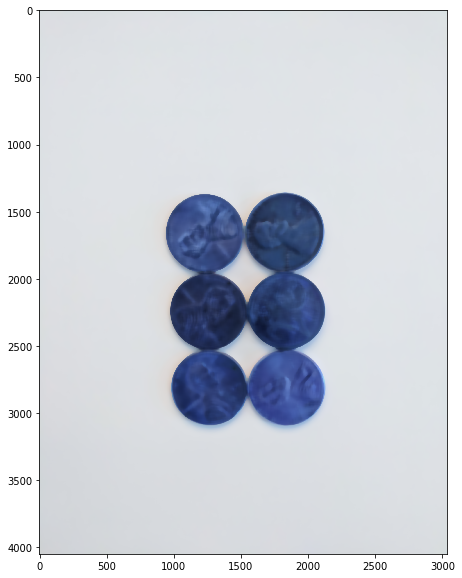

In [12]:
# Step2:Blur the image...when using wathershed, use strong blur on the kernel
sep_blur = cv2.medianBlur(sep_coins, 35)
display(sep_blur)

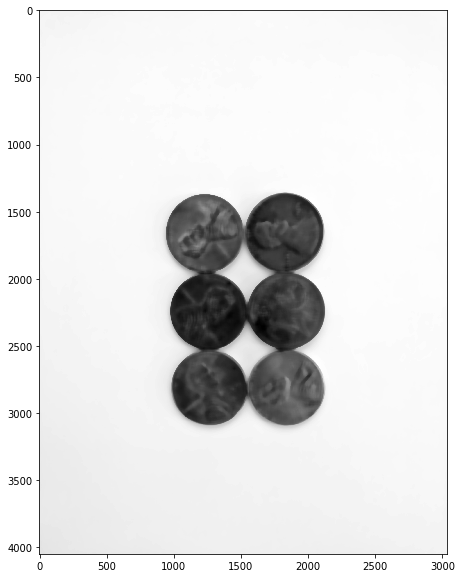

In [14]:
# step 3: Convert the image to gray scale
gray = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)
display(gray)

In [19]:
# Step4:  Apply a threshold using otsu 
ret, thresh = cv2.threshold(gray, 0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

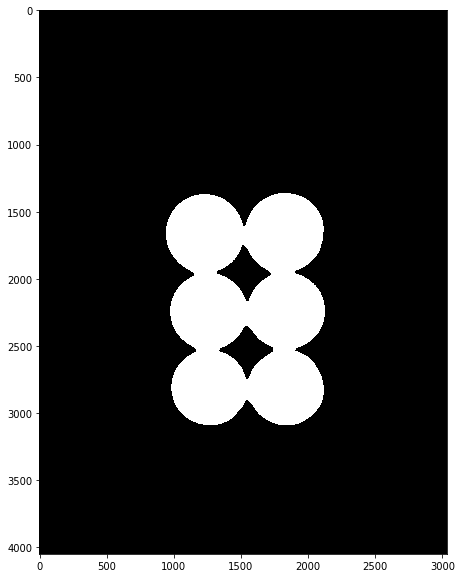

In [20]:
display(thresh)

In [21]:
# Step 5:  Noise removal using morphology operator or morphologyEx()
# substep: create kernel first to use in the morphologyEx() as parameter
kernel = np.ones((3,3), np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

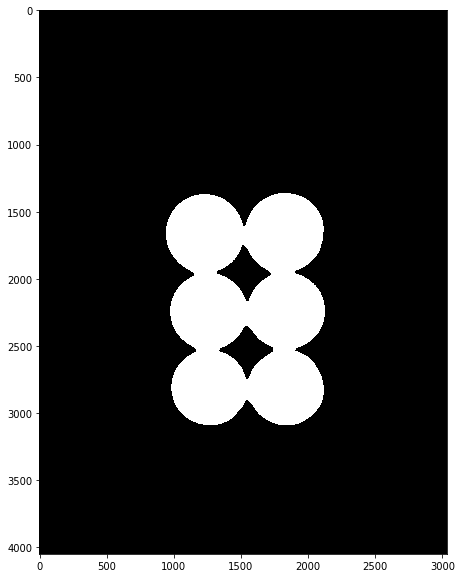

In [23]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel, iterations = 2)
display(opening)

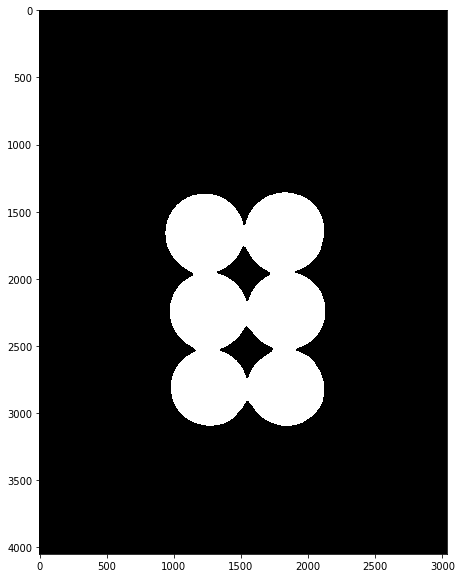

In [29]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
display(sure_bg)

# Distance Transform to get foreground more pormenant 

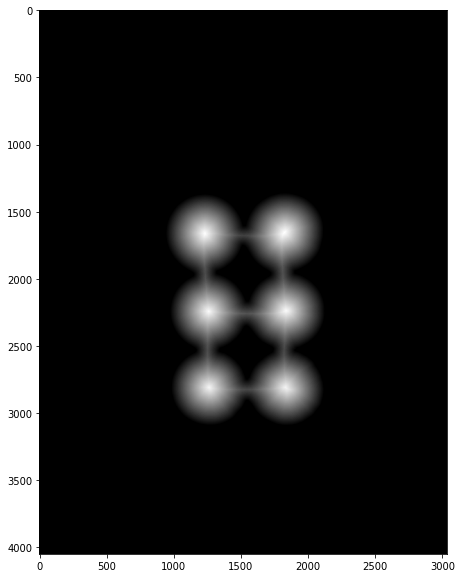

In [24]:
# But coins are still touching eachother...
# Distance Transform...right now in numpy, all visual values are in 0 and 1.
# but as you go further away from the background(0), instead of 1, we transform that value to 2,3,4 etc, making them brighter
#Expected: center of the image will become brighter...
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

display(dist_transform)


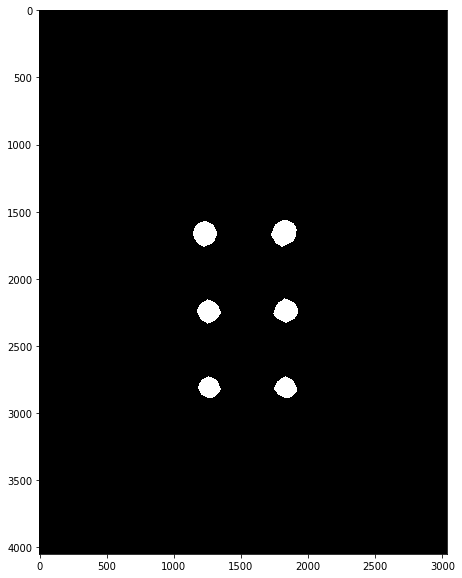

In [30]:
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
display(sure_fg)

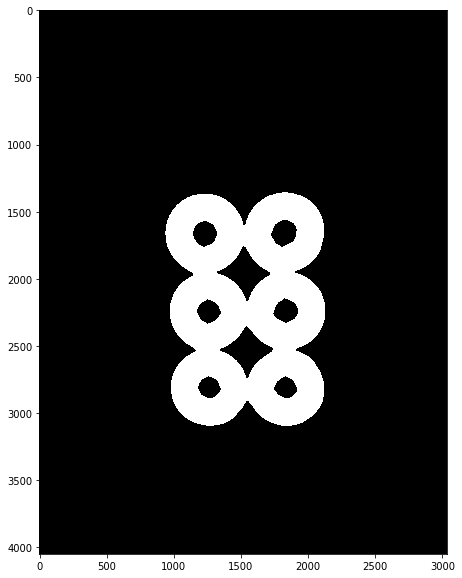

In [31]:
sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg, sure_fg)
display(unknown)


# Create markers for watershed algorithms

In [32]:
ret, markers = cv2.connectedComponents(sure_fg)   # this will make all of the 'unknown' areas in different colors.
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

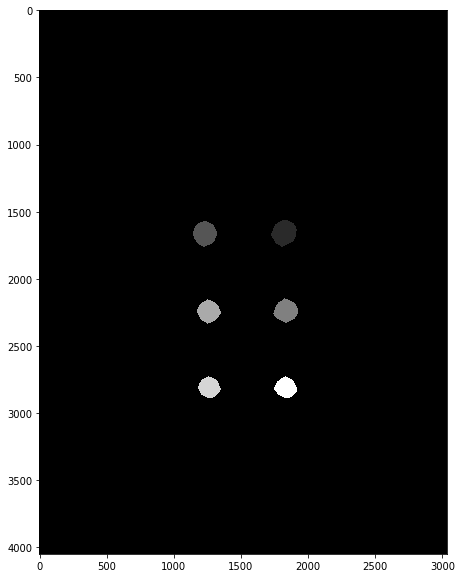

In [33]:
display(markers)

In [34]:
markers = markers +1

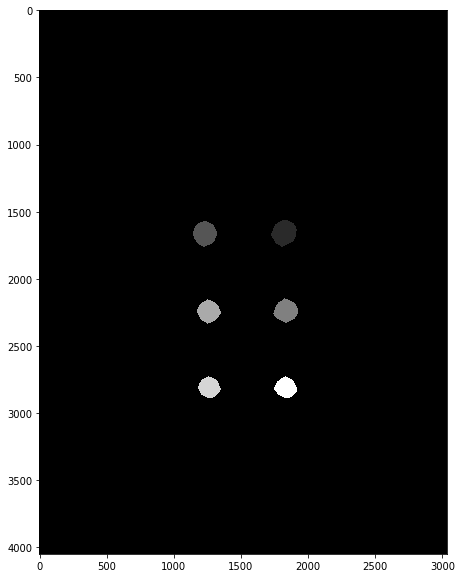

In [35]:
display(markers)

In [36]:
markers[unknown==255] = 0

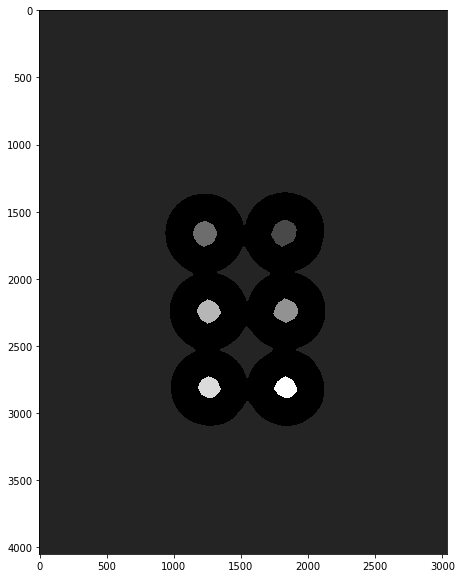

In [37]:
display(markers)    # black region around white is where you are unshore if it is object...

# Finally the watershed Algorithm application

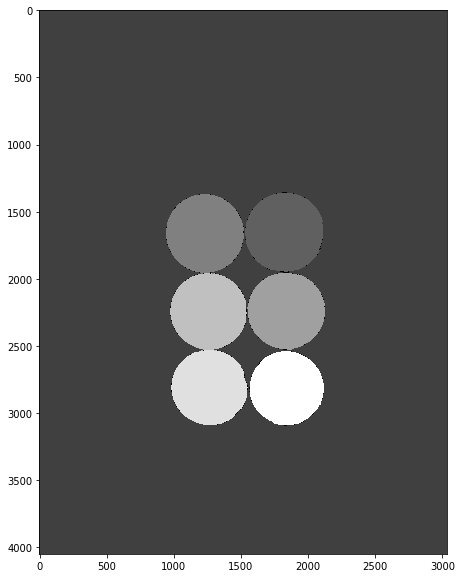

In [39]:
markers = cv2.watershed(sep_coins, markers)
display(markers)  
#after watershed() is applied, the shades of shapes are distinct...now we apply contours()

#  Applying contours

In [42]:
contours, heirarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if heirarchy[0][i][3]==-1:  # remember, -1  is the external contours
        cv2.drawContours(sep_coins,contours, i,(255,0,0),10)